In [1]:
import numpy as np
import os
import datetime
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import tensorflow.keras
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [2]:
actions = ['left', 'nomove', 'right', 'shoot']
action_label = {actions:i for i, actions in enumerate(actions)}
IMAGE_SIZE = (224, 224)

In [4]:
output_folder = "C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/Game2/Screenshots27k/Screenshots"

#model_path = "/content/drive/MyDrive"

In [5]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(output_folder,
                                                                                           batch_size=32,
                                                                                           labels='inferred',
                                                                                           label_mode='categorical',
                                                                                           image_size=IMAGE_SIZE,
                                                                                           validation_split=0.2,
                                                                                           subset="training",
                                                                                           shuffle=True,
                                                                                           seed = 62345)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(output_folder,
                                                                                           batch_size=32,
                                                                                           labels='inferred',
                                                                                           label_mode='categorical',
                                                                                           image_size=IMAGE_SIZE,
                                                                                           validation_split=0.2,
                                                                                           subset="validation",
                                                                                           shuffle=True,
                                                                                           seed = 12532)

Found 27437 files belonging to 4 classes.
Using 21950 files for training.
Found 27437 files belonging to 4 classes.
Using 5487 files for validation.


In [6]:
num_images_per_class = []

for label in training_dataset.class_names:
    dir_name = output_folder + '/' +label
    num_images_per_class.append(len([name for name in os.listdir(dir_name)]))
num_images_per_class

[7755, 7586, 7607, 4489]

In [7]:
training_dataset.class_names

['left', 'nomove', 'right', 'shoot']

In [ ]:
sum = np.sum(num_images_per_class)
weights = []
for i in num_images_per_class:
  weights.append(1.17-i/sum)
weights

[0.88735248022743, 0.8935120457775996, 0.8927466559755075, 1.0063888180194627]

In [8]:
training_dataset = training_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [9]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [10]:
cb = [tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')]

<function matplotlib.pyplot.show(close=None, block=None)>

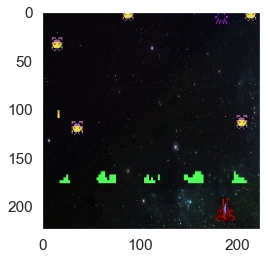

In [35]:
plt.imshow(cv2.cvtColor(cv2.imread('C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/Game2/Screenshots27k/Screenshots/left/screenshotABBKQB.jpg'), cv2.COLOR_BGR2RGB))
plt.grid(0)
plt.show
# cv2 reads images in BGR format, so we convert to RGB then display with plt.imshow()

## First

In [19]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.build((None, 224, 224, 3))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 3)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 37632)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               4817024   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                                 
Total params: 4,825,540
Trainable params: 4,825,540
Non-trainable params: 0
____________________________________________

In [22]:
history = model.fit(training_dataset, epochs=100, validation_data=validation_dataset, callbacks=cb, class_weight={0: 1, 1: 1, 2: 1, 3: 1})

Epoch 1/100
686/686 [==============================] - 23s 33ms/step - loss: 598.2770 - accuracy: 0.2779 - val_loss: 1.3642 - val_accuracy: 0.2812
Epoch 2/100
686/686 [==============================] - 23s 33ms/step - loss: 1.3679 - accuracy: 0.2741 - val_loss: 1.3651 - val_accuracy: 0.2812
Epoch 3/100
686/686 [==============================] - 24s 34ms/step - loss: 1.3684 - accuracy: 0.2751 - val_loss: 1.3652 - val_accuracy: 0.2761
Epoch 4/100
686/686 [==============================] - 24s 34ms/step - loss: 1.3687 - accuracy: 0.2767 - val_loss: 1.3645 - val_accuracy: 0.2761
Epoch 5/100
686/686 [==============================] - 23s 33ms/step - loss: 1.3685 - accuracy: 0.2761 - val_loss: 1.3640 - val_accuracy: 0.2761
Epoch 6/100
686/686 [==============================] - 23s 34ms/step - loss: 1.3687 - accuracy: 0.2763 - val_loss: 1.3642 - val_accuracy: 0.2805
Epoch 7/100
686/686 [==============================] - 23s 34ms/step - loss: 1.3688 - accuracy: 0.2809 - val_loss: 1.3640 - val_

KeyboardInterrupt: 

In [32]:
labels = []
predictions = []
for x,y in validation_dataset:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x, verbose=0),1).numpy())
# verbose = 0 disables progress bar prints

In [33]:
import itertools
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

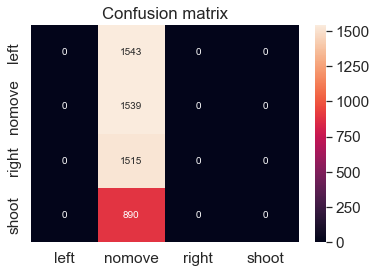

In [34]:
CM = confusion_matrix([np.argmax(y, axis=None, out=None) for y in labels], predictions)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=actions, 
           yticklabels=actions, ax = ax, fmt='g')
ax.set_title('Confusion matrix')
plt.show()